<a href="https://colab.research.google.com/github/Luffeboy/Colabstuff/blob/main/Classification_Diagnosing_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Diagnosing Diabetis

The purpuse a this assignment is to try out one ot more classification algoritms on a diabates dataset. We start with a Decision Tree Classifier. Start running all the cells and the do the mentioned exercises

In [1]:
#Import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
#Establishing graphical routine decision trees
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Download data in a DataFrame structure
data_ref = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/main/diabetes.csv"
diabetesData = pd.read_csv(data_ref)
type(diabetesData)


pandas.core.frame.DataFrame

In [4]:
#Show diabetes data
diabetesData

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#Establish class names for the diagnosis
class_Names = ["Negative", "Positive"]
class_Names

['Negative', 'Positive']

In [6]:
#Establish names for the features, that we will use for predicting the diagnosis
feature_Names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", 	"DiabetesPedigreeFunction", "Age"]

In [7]:
#Extracting features leaving out 'Outcome'
X = diabetesData.iloc[:, :-1].values

#Extracting labels:
y = diabetesData["Outcome"]

In [9]:
type(X)

numpy.ndarray

In [10]:
#Extract learning and test sets
from sklearn.model_selection import train_test_split
#train_test_split parameters: array with the data, what values to test with, stratify is for making sure there is the same amount of each class in the training and testing setes, random_state = seed for sudo-random numbers
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Exercise(s)

1.   Explain what the `train_test_split` is doing for us?



Splits the data into training and testing data sets.

In [90]:
#We pick a DecisionTreeClassifier to experent with
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=42)

In [91]:
#Let the classifier learn from training data
tree_clf.fit(X_train, y_train)
#tree_clf.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [110]:
#Let the classifier predict diagnosis on training data
y_train_pred=tree_clf.predict(X_train)
type(y_train_pred)

numpy.ndarray

In [93]:
#Establish confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train, y_train_pred)

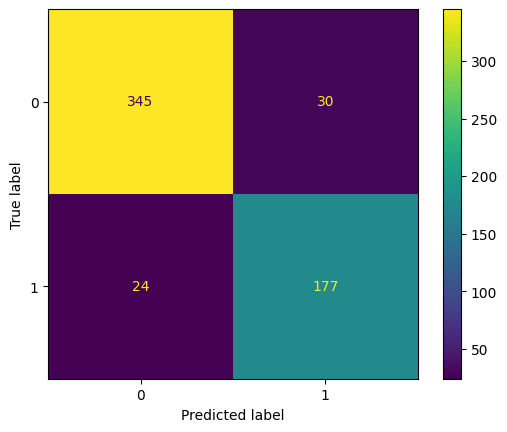

In [94]:
#Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [111]:
#Calculate the accuracy score on training set:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.90625

### Exercise(s)

1.   Explain the confusion matrix above
2.   What does `accuracy_score` tell us?



1:

314 true negatives and 167 true positives

Along with 34 false negatives and 61 false positives

2:

(tp + tn) / (fp + fn)

How large a percentage of the data that predicted was predicted correctly, both in terms of the Recall and Precision.

In [96]:
#Export decision tree graphics to the "diabetes_tree.dot" file
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "diabetes_tree.dot"),  # path differs in the book
        feature_names=feature_Names,
        class_names=class_Names,
        rounded=True,
        filled=True
    )

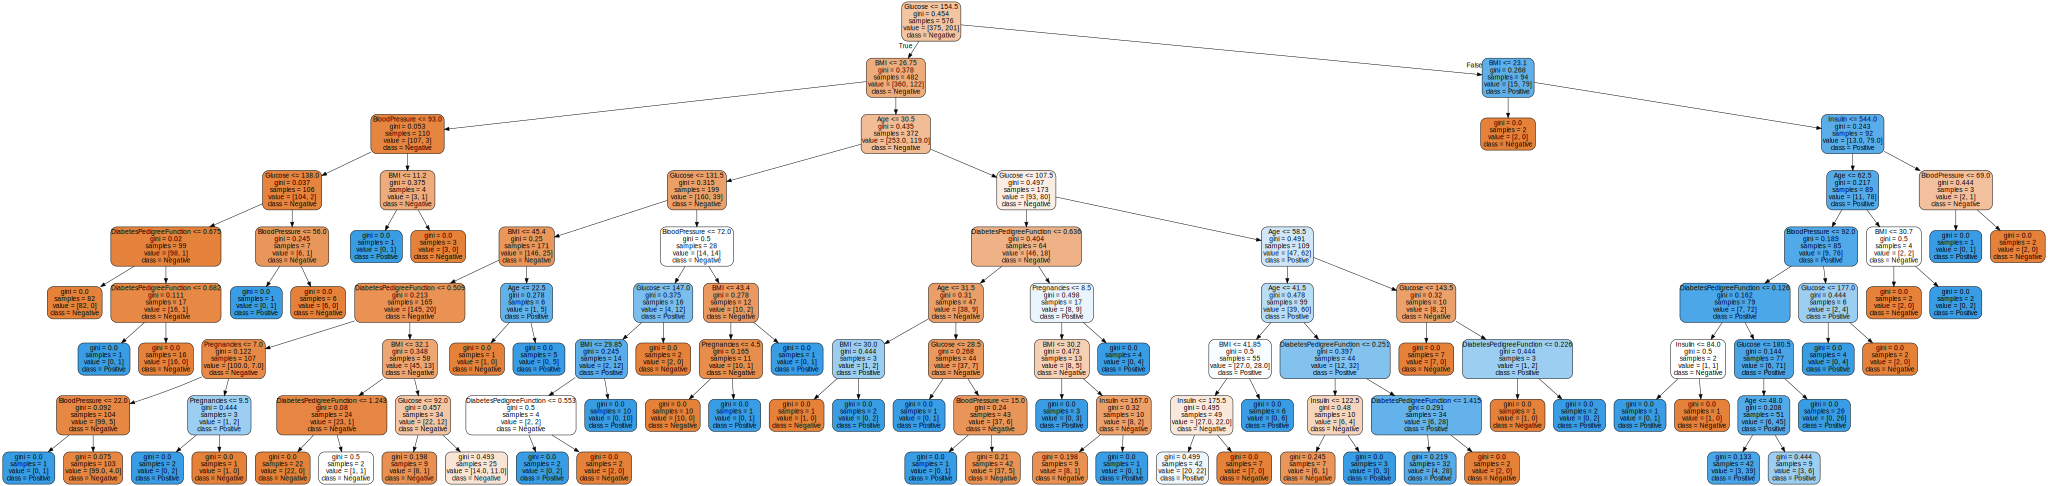

In [97]:
#Load decision tree graphic from the "diabetes_tree.dot" file
from graphviz import Source

Source.from_file(IMAGES_PATH / "diabetes_tree.dot")

In [98]:
#Let the classifier predict diagnosis on test data
y_test_pred=tree_clf.predict(X_test)

In [99]:
#Establish confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_test_pred)

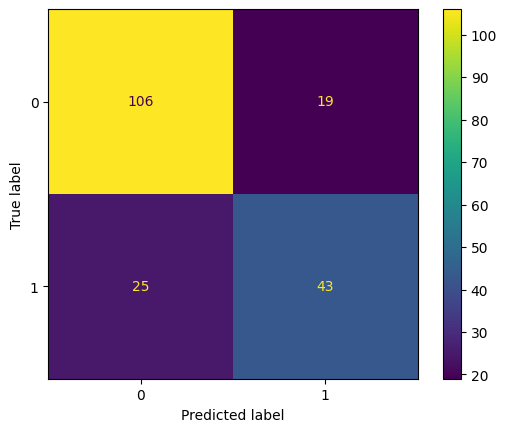

In [100]:
#Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [101]:
#Calculate the accuracy score on test data:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.772020725388601

###Exercise(s)

1.   Compare accuracy scores on training and test data. What does this indicate?
2.   Calculate the recall score by establishing the following piece of code:
```
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred)
```
Add coding cell(s) acccordingly.
What is the recall score telling you?

3.   Calculate the precison score by establishing the following piece of code:
```
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred)
```
Add coding cell(s) acccordingly.
What is the precission score telling you?

4.   Try with another classifier algoritm. That is repeating the steps above with this algoritm. Compare performance scores (accuracy, recall & precission).
 Add the needed coding cell(s).
   




In [104]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_test_pred))
from sklearn.metrics import precision_score
print(precision_score(y_test, y_test_pred))

0.6323529411764706
0.6935483870967742


In [134]:
from sklearn.tree import ExtraTreeClassifier
etc = ExtraTreeClassifier(max_depth=9)
etc.fit(X_train, y_train)
y_train_pred_etc=etc.predict(X_train)

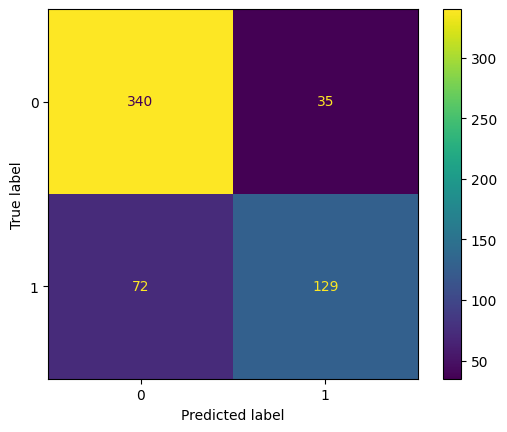

In [135]:
cm=confusion_matrix(y_train, y_train_pred_etc)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [136]:
print(accuracy_score(y_train, y_train_pred_etc))
y_test_pred_etc=etc.predict(X_test)
print(accuracy_score(y_test, y_test_pred_etc))

0.8142361111111112
0.7202072538860104
